In [22]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
data=pd.read_csv('twitter_label_manual.csv')
data

,id_str,created_at,crawled_at,screen_name,is_accident,full_text
0,1113976371515146240,2019-04-05 08:27:18,2020-02-08 12:30:29,mrahmatr7,1,"Rekaman CCTV Kecelakaan Motor di PIK, depan Ta..."
1,1114010329313206272,2019-04-05 10:42:14,2020-02-08 12:30:43,PanritaNews,1,"Tewaskan 346 Orang dalam 2 Kecelakaan, Boss Bo..."
2,1114037478237855745,2019-04-05 12:30:07,2020-02-08 12:30:56,VICE_ID,0,Anggota parlemen Taiwan juga berencana meningk...
3,1114121169873932288,2019-04-05 18:02:40,2020-02-08 12:31:38,OfficialSyariah,0,C.Gerakan.bicara pertolongan pertama pada kece...
4,1114149728323682305,2019-04-05 19:56:09,2020-02-08 12:31:54,AhliAsuransi,0,Asuransi mana nih??\n\nhttps://t.co/AJyABmimcY...
...,...,...,...,...,...,...
997,1241648950509047808,2020-03-22 15:52:33,2020-03-22 16:00:09,akun_b1j4k,0,"""Jatuh cinta itu adalah sebuah kecelakaan yang..."
998,1241721566016073728,2020-03-22 20:41:06,2020-03-22 20:45:09,officialFilza24,0,Pesan nasi goreng depan lapaknya ada kecelakaa...
999,1242306574887968768,2020-03-24 11:25:43,2020-03-24 11:30:10,sekitarbandung_,1,"Hati-hati, Lalin di Tol Purbaleunyi Baros KM 1..."
1000,1242347427262128128,2020-03-24 14:08:03,2020-03-24 14:15:08,ainaizt15,0,korang ada any idea tak macam mana nak bina sa...


In [24]:
selected = data[['is_accident']]
selected

,is_accident
0,1
1,1
2,0
3,0
4,0
...,...
997,0
998,0
999,1
1000,0


In [25]:
features_encoded = pd.get_dummies(selected, drop_first=True)

In [27]:
k=2
kmeans = KMeans(n_clusters=k, n_init=10)
kmeans.fit(features_encoded)

KMeans(n_clusters=2, n_init=10)

In [28]:
data['cluster'] = kmeans.labels_

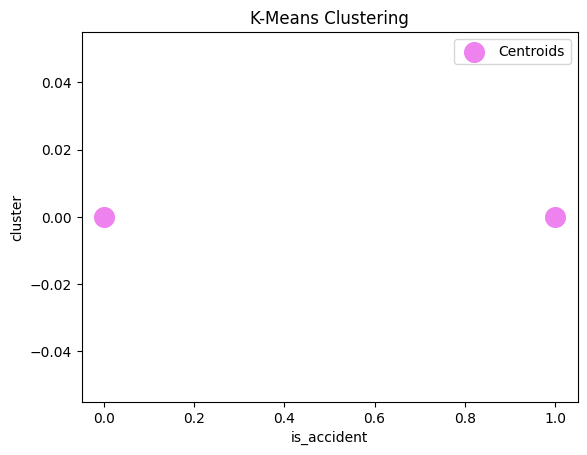

In [30]:
plt.scatter(data['is_accident'], [0] * len(data), c=data['cluster'], cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], [0] * k, s=200, c='violet', label='Centroids')
plt.xlabel('is_accident')
plt.ylabel('cluster')
plt.title('K-Means Clustering')
plt.legend()
plt.show()